In [6]:
import networkx as nx
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [26]:
G = nx.balanced_tree (3,3)

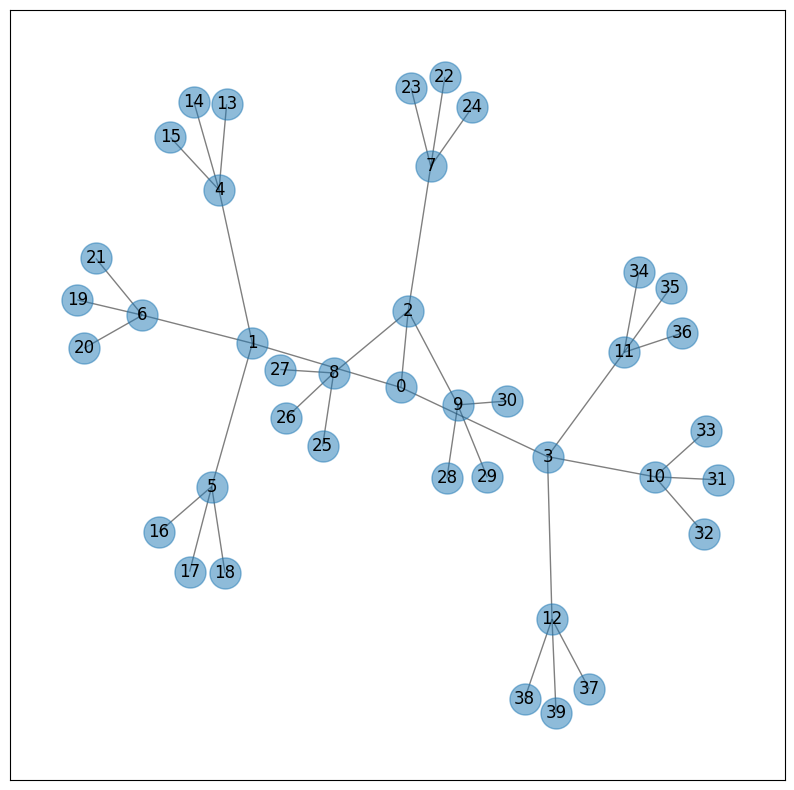

In [27]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=500, alpha=0.5)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
draw_graph(G)

In [28]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39))

In [29]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (1, 6), (2, 7), (2, 8), (2, 9), (3, 10), (3, 11), (3, 12), (4, 13), (4, 14), (4, 15), (5, 16), (5, 17), (5, 18), (6, 19), (6, 20), (6, 21), (7, 22), (7, 23), (7, 24), (8, 25), (8, 26), (8, 27), (9, 28), (9, 29), (9, 30), (10, 31), (10, 32), (10, 33), (11, 34), (11, 35), (11, 36), (12, 37), (12, 38), (12, 39)])

In [35]:
def bfs(graph, starting_node):
    visited = []
    queue = [starting_node]
    
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)            
            for edge in graph.edges:
                if edge[0] == node:
                    queue.append(edge[1])
                elif edge[1] == node:
                    queue.append(edge[0])
    return visited

Bad pipe message: %s [b'BH', b'=\xc0\xc9"H\x01!f\xad})\xfd\x97\x9d \xc7\xec\x9c\x109!\x01\xab\x98\xb3\x84\x83\xcf\xfa\\+\x0fU\xbf\x96\x17\xfe\xad<\x83\xd8\xeeSB\\_]\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+']
Bad pipe message: %s [b"Mgw\xa0\x89\xe4\x84\xf1\xde\xdeV<2U\x0be\xd7\x1b\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x

In [31]:
bfs(G, 1)

[1,
 0,
 4,
 5,
 6,
 2,
 3,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 7,
 8,
 9,
 10,
 11,
 12,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [32]:
def find_shortest_path(graph, starting_node, goal):
    visited = []
    queue = [[starting_node]]
    
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in visited:
            neighbours = []
            for edge in graph.edges:
                if edge[0] == node:
                    neighbours.append(edge[1])
                elif edge[1] == node:
                    neighbours.append(edge[0])
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                
                if neighbour == goal:
                    return new_path
            
            visited.append(node)
            
    return []

In [34]:
find_shortest_path(G, 1, 15)

[1, 4, 15]